# 신경망

신경망은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 이제부터 살펴볼 신경망의 중요한 성질이다.

![신경망](neural_network.png)

이 경우 0층이 입력층, 1층이 은닉층, 2층이 출력층이 된다.

h(x) 함수를 활성화 함수라 하는데, 활성화 함수는 입력신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.

(참고로 편향에 대해 입력값은 1이고 가중치는 b이다.)

1. 가중치가 달린 입력신호와 편향의 총합을 계산하고<br>
a=b+w1\*x1+w2\*x2<br>

2. y=h(a)<br>
a를 함수 h()에 넣어 y를 출력하는 흐름이다.

도식은 다음과 같다.<br>
![활성화함수](activation_function.png)

참고) 이 책에서는 일반적으로 단순 퍼셉트론은 단층 네트워크에서 step function을 활성화 하는 함수로 사용한 모델을 가리키고, 다층 퍼셉트론은 신경망(여러층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)를 가리킨다.

# 3.2 활성화 함수

퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다.

활성화 함수로 쓸 수 있는 여러 후보 중, 퍼셉트론은 계단함수를 채용한다. 

계단함수 이외의 함수를 사용하면? 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 난아가는 열쇠다.

중요!! 1. 활성화 함수의 역할    !!중요

신경망에서 활성화 함수는 각 뉴런의 출력값을 결정하는 함수입니다. 활성화 함수가 중요한 이유는 비선형성을 추가하기 위해서입니다. 신경망에서 비선형 활성화 함수를 사용해야만, 네트워크가 복잡한 비선형 함수를 근사할 수 있다. 비선형 활성화 함수를 사용하면, 여러 층을 쌓는 것이 더 복잡하고 강력한 모델을 만들 수 있습니다. 이렇게 비선형성을 도입함으로써, 신경망은 복잡한 패턴과 비선형 관계를 학습할 수 있게 된다.

# 3.2.1 시그모이드 함수

h(x)=$1\over 1+exp(-x)$

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다.

# 3.2.2 계단함수 구현하기

파이썬으로 계단함수를 구현해보자.

In [16]:
import numpy as np

def step_func(x):                   #이건 근데 인수로 numpy 배열을 넣을 수는 없다.
    if x>0:
        return 1
    else:
        return 0

In [17]:

step_func(np.array([1.0, 2.0]))             # 왜 안되냐? x에 numpy 배열을 넣었는데 그걸 if문에서 여러개를 체크하려 하니 오류가 뜨는거임

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
def step_func(x):                       #이번에는 numpy 배열도 사용할 수 있도록 해보자.
    y = x>0
    return y.astype(np.int64)           # 책에는 np.int라 적혀있지만, 현재 시점에서는 np.int는 비추천 타입이다. np.int64와 같이 구체적인 정수형 타입을 쓰는 것이 권장된다.

In [12]:
step_func(np.array([1.0, 2.,3.]))       # 이제 numpy 배열이 들어간다.

array([1, 1, 1], dtype=int64)

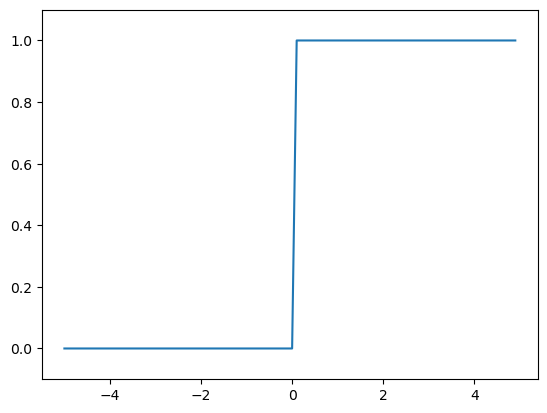

In [18]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0,dtype=np.int64)         #np.int로 안하도록 주의. np.int64로 바꿔라.

x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [19]:
# 참고로
x>0             # 이거 하면 boolean type의 배열로 변환된다.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# 3.2.4 시그모이드 함수

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))                                     #numpy 배열이어도 처리가 된다.

In [23]:
x=np.array([-1.0, 1.0, 2.0])                                    #numpy 배열을 넣어보자.
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

참고) numpy 배열이 훌륭히 처리되는데 이는 numpy broadcast 때문이다. 브로드캐스트 기능이란 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 바꿔 수행하는 것이다.

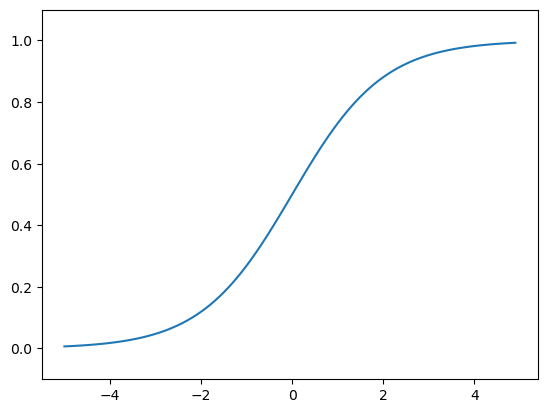

In [24]:
#sigmoid 함수를 plot해보자.
x=np.arange(-5,5,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

# 3.2.5 시그모이드 함수와 계단함수 비교


#### 차이점
sigmoid 함수와 계단함수를 비교해보면 시그모이드 함수가 매끄럽다. 시그모이드 함수의 출력이 연속적으로 변화하는 반면, 계단 함수는 0을 경계로 출력이 갑자기 바뀌어버린다.

계단함수는 0과 1 중 하나의 값만 돌려주는 반면, 시그모이드 함수는 실수를 돌려준다. 다시말해, 퍼셉트론에서는 뉴런 사이에 0혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐른다.

#### 공통점
공통점으로는 둘 다 비슷한 모양을 가지고 있고, 둘 다 입력이 작을 때는 출력이 0에 가깝고, 입력이 커지면 출력이 1에 가까워지는 구조다.

즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고, 입력이 중요하지 않으면 작은 값을 출력한다. 그리고 입력이 아무리 작거나 커도 출력은 0에서 1 사이라는 것도 둘의 공통점이다.

# 3.2.6 비선형 함수

그리고 계단함수와 시그모이드 함수의 중요한 공통점은 둘 다 비선형 함수이다.(비선형 함수는 선형이 아닌 함수 즉, 직선 1개로는 그릴 수 없는 함수를 의미함.)

그리고 신경망에서는 선형함수를 사용하면 안되고, 비선형함수를 사용해야한다.<br>
왜와이? 선형함수를 이용하면 신경망의 층을 깊게하는 의미가 없어지기 때문. 즉, 선형함수의 문제는 층을 아무리 깊게해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다.

# 3.2.7 ReLU 함수

최근에는 신경망에서 시그모이드 함수보다 ReLU함수를 주로 이용한다.

ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하이면 0을 출력하는 함수다.

왜 ReLU를 사용할까?

* 선형 부분 (입력값이 0보다 클 때)은 기울기가 일정하여 빠르게 계산할 수 있습니다.
* 비선형 부분 (입력값이 0 이하일 때)은 "차단" 효과를 주어 정보의 흐름을 조절합니다. 이 비선형 특성이 신경망을 강력하게 만들어줍니다.

In [25]:
def relu(x):
    return np.maximum(0,x)

이번장에서는 시그모이드 함수를 활성화 함수로 사용하지만, 이 책 후반부에서는 ReLU함수를 주로 사용한다.

# 3.3 다차원 배열의 계산

# 3.3.1 다차원 배열

넘파이를 사용해서 다차원 배열을 살펴보자

In [2]:
#일단 1차원 배열을 보자.

import numpy as np

A=np.array([1,2,3,4])
print(A)
print(np.ndim(A))               #차원 수를 출력
print(A.shape)                  #배열의 형상을 출력. 참고로 얘는 튜플을 반환한다.

[1 2 3 4]
1
(4,)


In [3]:
arr_2d = np.array([[1, 2], [3, 4], [5, 6]])
arr_2d.ndim

2

## 3.2.2 행렬의 곱

np.dot을 이용

dot product에 대해 1d array의 연산이 다소 헷갈렸다. 다음 링크들을 참고해라

[링크1](https://stackoverflow.com/questions/54730082/why-does-numpy-dot-product-of-2d-array-with-1d-array-produce-1d-array)

[링크2](https://stackoverflow.com/questions/43232938/np-array-dot-product-of-vector-and-array)


요점은 다음과 같다.

> If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.

In [17]:
A=np.array([[1,2],[3,4]])
print(A.shape)

B=np.array([[5,6],[7,8]])
print(B.shape)

np.dot(A,B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다.

그리고 예를들어 A의 배열의 형상이 m X n 이라면 B를 곱할 때는 B의 행의 수가 n 이어야 한다.

In [7]:
A=np.array([[1,2,3],[4,5,6]])
print(A.shape)                      #2x3행렬

B=np.array([[1,2],[3,4],[5,6]])   
print(B.shape)                      #3x2행렬

np.dot(A,B)                         #2x2행렬

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [9]:
A=np.array([[1,2,3],[4,5,6]])
print(A.shape)                      #2x3행렬

B=np.array([[1,2],[5,6]])   
print(B.shape)                      #2x2행렬

np.dot(A,B)                         #에러가 뜬다.

(2, 3)
(2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [12]:
A=np.array([[1,2],[3,4],[5,6]])
A.shape
B=np.array([7,8])
B.shape

(2,)

In [13]:
A = np.array([[1, 2], [3, 4], [5, 6]])  # 3x2 행렬
B = np.array([7, 8])  # 1D 배열 (행벡터로 취급)
print(np.dot(A, B))  # 내적 계산


[23 53 83]


## 3.3.3 신경망에서의 행렬 곱

![신경망에서의 행렬 곱](dot_product_and_neural_network.png)

행렬의 곱으로 한꺼번에 계산해주는 기능은 신경망을 구현할 때 매우 중요하다.

In [20]:
import numpy as np
x=np.array([1,2])
w=np.array([[1,3,5],[2,4,6]])

y=np.dot(x,w)

print(y)

[ 5 11 17]


# 3.4 3층 신경망 구현하기

3층 신경망에서 수행되는 입력부터 출력까지의 처리(순방향 처리)를 구현하자. 이를 위해 넘파이의 다차원 배열을 사용한다. 넘파이의 배열을 이용하면 아주 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다.

## 3.4.1 표기법

![표기법](conc.png)

## 3.4.2 각층의 신호전달 구현하기

![layer_transmission](layer_transmission.png)

편향을 뜻하는 뉴런이 추가됨. 편향의 오른쪽 아래 인덱스가 하나밖에 없다는 것을 참고해라.(앞 층의 편향 뉴런은 하나뿐이기 때문)

a<sub>1</sub><sup>(1)</sup>=w<sub>11</sub><sup>(1)</sup>x<sub>1</sub>+w<sub>12</sub><sup>(2)</sup>x<sub>2</sub>+b<sub>1</sub><sup>(1)</sup>

간소화 하면

A<sup>(1)</sup>=XW<sup>(1)</sup>+B<sup>(1)</sup>

In [27]:
X=np.array([1.0, 0.5])
W1=np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B=np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)

print('---')

print(np.dot(X,W1).shape)
print(B.shape)

print('---')

A1=np.dot(X,W1)+B
print(A1)
print(A1.shape)

(2, 3)
(2,)
---
(3,)
(3,)
---
[0.3 0.7 1.1]
(3,)


1층의 활성화 함수에서의 처리

![이미지](1st_layer.png)

여기에서의 활성화 함수로 시그모이드 함수를 사용하기도 한다. 아래에서는 파이썬으로 구현해보자.

In [31]:
#sigmoid 함수부터 다시 구현해보자.

def sigmoid(x):
    return 1/(1+np.exp(-x))

Z1=sigmoid(A1)
print(A1)
print(Z1)


[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [34]:
W2=np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2=np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2=np.dot(Z1,W2)+B2
print(A2)
Z2=sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


2층에서 출력층으로 신호전달 또한 그동안의 구현과 거의 같다. 단, 활성화 함수만 지금까지의 은닉층과 다르다.

![output_layer](output_layer.png)

In [36]:
# 출력층의 활성화 함수로 항등함수를 정의하고 사용하자.

def Identity_function(x):
    return x

W3=np.array([[0.1, 0.3], [0.2, 0.4]])
B3=np.array([0.1, 0.2])

A3=np.dot(Z2,W3)+B3
print(A3)

Y=Identity_function(A3)

[0.31682708 0.69627909]


참고) 출력층의 활성화 함수에는 풀고자 하는 문제의 성질에 맞게 정한다. 예를들어, 회귀에는 항등함수, 2클래스 분류에는 시그모이드 함수, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.

In [38]:
def init_network():
    network={}
    network['W1']=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1']=np.array([0.1, 0.2, 0.3])
    network['W2']=np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['B2']=np.array([0.1, 0.2])
    network['W3']=np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3']=np.array([0.1, 0.2])

    return network

def forward_network(network, x):                               # 순방향으로 신호가 전달됨.
    W1, W2, W3=network['W1'], network['W2'], network['W3']
    B1, B2, B3=network['B1'], network['B2'], network['B3']
    a1=np.dot(x,W1)+B1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+B2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+B3
    y=Identity_function(a3)

    return y



x=np.array([1.0, 0.5])
network=init_network()
y=forward_network(network, x)
print(y)



    

[0.31682708 0.69627909]


# 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.

일반적으로 회귀에는 항등함수, 분류에는 소프트맥스 함수를 사용한다.

기계학습 문제는 분류(classification)과 회귀(regression)으로 나뉜다.
* 분류: 데이터가 어느 클래스(class)에 속하느냐는 문제
* 회귀: 입력 데이터에서 (연속적인) 수치를 예측하는 문제

항등함수에서 사용되는 그림

![identify](identify_func.png)

분류류에서 사용되는 소프트 맥스 함수는 다음과 같다.

![softmax](softmax_func.png)

![softmax_](soft_max_.png)

softmax의 출력은 모든 입력 신호로부터 화살표를 받는다. 이는 함수의 분모를 보았을 때, 출력층의 각 뉴런이 모든 입력신호에서 영향을 받기 때문에 그렇다.


In [39]:
a=np.array([0.3, 2.9, 4.0])

exp_a=np.exp(a)

sum_exp_a=np.sum(exp_a)

y=exp_a/sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [40]:
#소프트 맥스 함수를 함수로 구현하자.

def softmax(a):
    exp_a=np.exp(a)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a

    return y

## 3.5.2 소프트맥스 함수 구현 시 주의점

exponential은 큰 값을 도출할 수 있는데 이는 오버플로 문제를 발생시킬 수 있다. 이런 큰 값끼리 나눗셈을 하면 결과 수치가 불안정 해지므로 이 문제를 해결하도록 소프트맥스 함수 구현을 개선해야 한다.

![improved_softmax](improved_softmax.png)

소프트 맥스의 지수함수를 계산할 때 어떤 정수를 더해도 결과는 바뀌지 않는다.<br>
여기서 C'에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다.

In [45]:
# 하나의 예시를 보자.
a=np.array([1010, 1000, 990])

print(np.exp(a))            # 제대로 계산되지 않았다.

[inf inf inf]


C:\Users\dhlee\AppData\Local\Temp\ipykernel_3652\1681432748.py:4: RuntimeWarning: overflow encountered in exp
  print(np.exp(a))            # 제대로 계산되지 않았다.


In [47]:
c=np.max(a)                 # 1010이 나온다.

print(a-c)

np.exp(a-c)/np.sum(np.exp(a-c))

[  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

입력 신호 중 최대값(이 예에서는 c)을 빼주면 올바르게 계산할 수 있다. <br>

이를 바탕으로 소프트맥스 함수를 다시 구현해보자.

In [49]:
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    exp_sum_a=np.sum(exp_a)
    y=exp_a/exp_sum_a
    
    return y

## 3.5.3 소프트 함수의 특징

In [50]:
a=np.array([0.3, 2.9, 4.0])

y=softmax(a)

print(y)

print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


소프트 함수의 출력은 0과 1.0 사이의 실수이다. 또한 소프트 맥스 함수의 총합은 1이다!!

이러한 특징 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.

특히 앞의 y의 경우 y[0]=1.8%, y[1]=24.5%, y[2]=73.7%로 해석할 수 있다.

이 결과 2번째 원소의 확률이 가장 높으니, 답은 2번째 클래스다 라고 할 수 있다. 즉 소프트맥스 함수를 이용함으로써 문제를 확률적으로 대응할 수 있게 된다.


주의할 점) 소프트맥스 함수를 적용해도 각 원소의 대소관계는 변하지 않는다. 예를 들자면, a에서 가장 큰 원소는 2번째 원소이고, y에서 가장 큰 원소도 2번째 원소이다.

<br>

신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다.

기계학습 문제풀이는 **학습**과 **추론** 두 단계로 이루어짐.

기계학습에서 학습 단계에서 모델을 학습하고, 추론 단계에서 앞서 학습한 모델로 미지의 데이터에 대해 추론을 수행한다. 다만, 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이다. 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수를 사용한다.(4장참고)

## 3.5.4 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다. 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다. 예를 들어, 입력 이미지를 숫자 0부터 9 중 하나로 분류하는 문제라면, 출력층의 뉴런을 10개로 설정한다.

# 3.6 손글씨 숫자 인식

이번 절에서는 이미 학습된 매개변수를 사용하여 학습과정은 생략하고, 추론과정만 구현한다. 추론과정을 신경망의 순전파 forward propagation라고도 한다.

참고) 신경망도 두단계를 거쳐 문제를 해결한다. 먼저 훈련데이터(학습데이터)를 사용해 가중치 매개변수를 학습하고, 추론단계에서는 앞서 학습한 매개변수를 사용하여 입력데이터를 분류한다.

## 3.6.1 MNIST 데이터셋

In [ ]:
import sys 
import os
sys.path.append(os.pardir) # 부모 디렉토리
from dataset.mnist import load_mnist # dataset폴더에 있는 mnist라는 파일에서 load_mnist라는 함수를 import 해라

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

#각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


load_mnist 함수는 읽은 데이터를 (훈련이미지,훈련레이블), (시험이미지,시험레이블) 형식으로 반환한다. 인수로는 normalize, flatten, one_hot_label 세 가지를 설정할 수 있다. 세 인수 모두 bool 값이다. 첫 번째 인수인 normalize는 입력 이미지의 픽셀값을 0.0~1.0 사이의 값으로 정규화할지를 정한다. False로 설정하면 입력이미지의 픽셀은 원래 값 그대로 0~255 사이의 값을 유지한다. 두 번째 인수인 flatten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정한다. False로 설정하면 입력 이미지를 1x28x28의 3차원 배열로, True로 설정하면 784개의 원소로 이뤄진 1차원 배열로 저장한다. 세 번째 인수인 one_hot_label은 레이블을 원-핫-인코딩 형태로 저장할지를 정한다. 원-핫 인코딩이란 정답을 뜻하는 원소만 1이고 나머지는 모두 0인 배열이다. 이것이 False이면 7이나 2와 같은 숫자 형태의 레이블을 저장하고 True이면 원-핫 인코딩하여 레이블을 저장한다.

참고) pickle 파일에 대해서도 알아두면 좋을 것이다.

데이터도 확인할 겸 MNIST 이미지를 화면으로 불러오도록 하자. 이미지 표시에는 PIL(python image library) 모듈을 사용한다.

In [13]:
#mnist_show.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import numpy as np
from dataset.mnist import load_mnist    # dataset폴더에 있는 mnist라는 파일에서 load_mnist라는 함수를 import 해라
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))     # 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환하는 함수.
                                                 # np.uint8(img)를 사용하는 이유는 이미지 데이터를 uint8(부호 없는 8비트 정수형) 타입으로 변환하기 위함입니다. 
                                                 # 이미지를 다룰 때 픽셀 값은 일반적으로 0부터 255까지의 정수 값으로 표현됩니다. 
                                                 # PIL 라이브러리의 Image.fromarray() 함수는 이러한 픽셀 값 범위를 처리할 수 있는 uint8 데이터 타입을 요구합니다.
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)    # flattern = True로 설정해 읽어 들인 이미지는 1차원 넘파이 배열로 저장

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


참고할만한 사이트)
[Image.fromarray()](https://supermemi.tistory.com/entry/Python-PIL-PIL-%EC%9D%B4%EB%AF%B8%EC%A7%80-Numpy-%EB%B0%B0%EC%97%B4-%EB%B3%80%ED%99%98-%EB%B0%8F-%EC%A0%80%EC%9E%A5-Imagefromarray-nparray-npasarray)

## 3.6.2 신경망의 추론처리

이 MNIST 데이터셋을 가지고 추론을 수행하는 신경망을 구현할 차례이다. 이 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다.

입력층 뉴런은 이미지 크기가 28x28=784이기 때문이고, 출력층 뉴런이 10인 이유는 0에서 9까지의 숫자를 구분하는 문제이기 때문.

은닉층은 총 두개, 첫번째 은닉층에는 50개 뉴런, 두번째 은닉층에는 100개의 뉴런(50과 100은 임의로 정한 값이다.)

In [12]:
#neuralnet_mnist.py

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


# x_train: 훈련용 이미지 데이터 (사용하지 않고, 이 코드에서는 x_test만 반환합니다).
# x_test: 테스트용 이미지 데이터 (이 데이터가 get_data() 함수에서 반환됩니다).
# t_train: 훈련용 레이블 데이터.
# t_test: 테스트용 레이블 데이터.

def get_data(): 
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():                 # pickle파일인 sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽는다.
                                    # 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.
    with open("C:/git_experiment/RWL_Intern/dh_workspace/밑바닥부터 시작하는 딥러닝/ch03/sample_weight.pkl", 'rb') as f: # pickle로 저장된 데이터를 읽을 때는 반드시 바이너리 모드로 파일을 열고,
        network = pickle.load(f)                # 그 다음에 pickle.load()를 사용하여 파일에서 데이터를 복원해야 한다.                                       
    return network                              # 참고로 network는 dictionary다.


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

#위의 세 함수를 사용해서 신경망에 의한 추론을 수행해보고, 정확도(accuracy)(분류가 얼마나 올바른가)도 평가해보자.

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:   # 예측 답변과 정답 레이블을 비교하여 맞힌 숫자를 세고, 이를 전체 이미지 숫자로 나눠 정확도를 구한다. 참고로 확률 비교가 아닌 index 비교를 함.
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


이 예에서는 load_mnist 함수의 인수인 normalize를 True로 설정했다. normalize를 True로 설정하면 0~255 범위인 각 픽셀의 값을 0.0 ~ 1.0 범위로 변환한다.( 단순히 픽셀의 값을 255로 나눈다.) 이처럼 데이터를 특정 범위로 변환하는 처리를 정규화 normalize 라 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리 pre-processing이라 한다. 여기에서는 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행한 것이다.

참고) 현업에서도 신경망에 전처리를 활발히 사용한다. 앞의 예에서는 각 픽셀의 값을 255로 나누는 단순한 정규화를 수행했지만, 현업에서는 데이터 전체의 분포를 고려해 전처리하는 경우가 많다. 예를 들어, 데이터 전체 평균과 표준 편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동하거나 데이터의 확산 범위를 제한하는 정규화를 수행한다. 그 외에도 전체 데이터를 균일하게 분포시키는 데이터 백색화(whitening) 등도 있다.

## 3.6.3 배치 처리

구현 진도를 더 나가기 전에, 이번 절에서는 입력 데이터와 가중치 매개변수의 '형상'에 주의해서 조금 전의 구현을 다시 살펴보자.

In [19]:
x,_=get_data()
network=init_network()
W1, W2, W3=network['W1'], network['W2'], network['W3']

print(x.shape)

print(W1.shape)

print(W2.shape)

print(W3.shape)


(10000, 784)
(784, 50)
(50, 100)
(100, 10)


![batch](batch.png)

100장 분량의 입력 데이터의 결과가 한 번에 출력되었다.

가령 x[0]와 y[0]에는 0번째 이미지와 그 추론결과가, x[1]과 y[1]에는 1번째 이미지와 그 결과가 저장되는 식이다.

이처럼 하나로 묶은 입력 데이터를 배치(batch)라 한다. 배치가 곧 묶음이란 의미다. 이미지가 지폐처럼 다발로 묶여 있다고 생각하면 된다.

**배치(batch)**는 **입력 데이터(x)**와 **정답 레이블(y)**를 모두 포함합니다. 일반적으로 신경망에서 배치 처리를 할 때, 입력 데이터와 그에 대한 레이블이 함께 묶여서 하나의 배치가 형성됩니다.

In [20]:


x, t = get_data()
network = init_network()

batch_size=100      #배치 크기
accuracy_cnt=0


for i in range(0, len(x), batch_size):              #len(x)는 10000개.
    x_batch=x[i:i+batch_size]                       #입력데이터를 i에서 i+99까지 묶는다.(총 100개)
    y_batch=predict(network, x_batch)               #predict함수를 해서 y_batch를 구함.
    p=np.argmax(y_batch, axis=1)                    #크기가 큰큰 놈들을 고른다. axis=1은 100x10의 배열 중 행방향 연산을 한거다. 아래에서 그 예시를 보자.
    accuracy_cnt+=np.sum(p==t[i:i+batch_size])      #p==t[i:i+batch_size]에서 bool을 가져와서 true와 false로 분류한 후 그 개수를 sum 한다.

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

10000
Accuracy:0.9352


In [25]:
import numpy as np

arr = np.array([[1, 2, 3], [10, 5, 6], [7, 13, 9]])

y=np.argmax(arr,axis=1)
print(y)

[2 0 1]
